In [55]:
import sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import wordcloud
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk 
import re
import string

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import wikipedia
tintin = wikipedia.page('The Adventures of Tintin')
bleach = wikipedia.page('Ichigo Kurosaki')

In [60]:
corpus = [tintin.content, bleach.content]

In [74]:
corpus[0][0:50]

'The Adventures of Tintin (French: Les Aventures de'

In [62]:
def cleaning_reviews(text_data):
    text = re.sub(r'\[[0-9]*\]',' ', text_data)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', " ", text)
    text = i.lower()
    pattern = re.compile('http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub("", text)
    tokens = nltk.word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_word = set(stopwords.words('english'))
    stop_word.discard("not")
    words = [nltk.WordNetLemmatizer().lemmatize(w) for  w in words if not w in stop_word]
    return(words)

In [63]:
vals = []
for i in corpus:
    vals.append(cleaning_reviews(i))
print(vals.__len__())

2


In [76]:
vals[0][0:5]

['adventure', 'tintin', 'french', 'le', 'aventures']

In [65]:
from gensim import corpora

In [66]:
input_dict = corpora.Dictionary(vals)
input_corpus = [input_dict.doc2bow(token, allow_update=True) for token in vals]

In [67]:
input_dict[0]

'abandoned'

In [68]:
import gensim
lda_model = gensim.models.ldamodel.LdaModel(input_corpus, id2word=input_dict, num_topics=2, random_state=200, update_every=1, chunksize=100, passes=10)

In [69]:
topics = lda_model.print_topics(num_words=20)

In [70]:
topics

[(0,
  '0.032*"ichigo" + 0.013*"soul" + 0.012*"character" + 0.009*"series" + 0.008*"reaper" + 0.008*"power" + 0.007*"rukia" + 0.005*"kubo" + 0.005*"bleach" + 0.005*"one" + 0.004*"anime" + 0.004*"hollow" + 0.004*"fight" + 0.004*"also" + 0.004*"yhwach" + 0.003*"first" + 0.003*"manga" + 0.003*"society" + 0.003*"reader" + 0.003*"however"'),
 (1,
  '0.035*"tintin" + 0.023*"hergé" + 0.008*"adventure" + 0.007*"le" + 0.005*"work" + 0.005*"comic" + 0.005*"series" + 0.005*"book" + 0.005*"de" + 0.004*"haddock" + 0.004*"original" + 0.004*"first" + 0.004*"character" + 0.004*"belgian" + 0.003*"album" + 0.003*"based" + 0.003*"belgium" + 0.003*"story" + 0.003*"also" + 0.003*"version"')]

In [71]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [72]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, input_corpus, input_dict, mds ='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.005406 -0.095401       1        1  74.708883
0      0.005406  0.095401       2        1  25.291117, topic_info=           Term        Freq       Total Category  logprob  loglift
2416     ichigo   54.000000   54.000000  Default  30.0000  30.0000
1990     tintin  174.000000  174.000000  Default  29.0000  29.0000
2613       soul   22.000000   22.000000  Default  28.0000  28.0000
905       hergé  114.000000  114.000000  Default  27.0000  27.0000
324   character   38.000000   38.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1587     reader    4.676242   10.591661   Topic2  -5.8805   0.5571
778       first    5.833268   25.846787   Topic2  -5.6594  -0.1139
1988       time    4.133848   10.037117   Topic2  -6.0038   0.4876
772        film    3.605072   15.777627   Topic2  -6.1406  -0.1015
976   including    3.576395    7.126189   Topic2  -6.1486   0.6853

[117 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
38        1  1.000102  adventure
2212      2  0.983304      aizen
57        1  0.975425      album
69        1  0.695996       also
69        2  0.298284       also
...     ...       ...        ...
2180      1  0.905589      world
2180      2  0.069661      world
2689      2  0.890154     yhwach
2692      2  0.882101   zangetsu
2693      2  1.005018  zanpakutō

[106 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

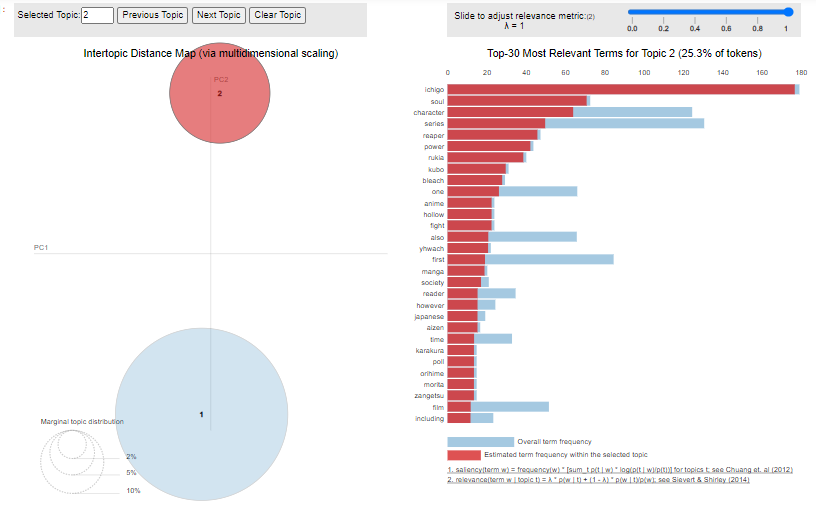

In [78]:
from IPython.display import Image
Image(filename=r"C:\Users\welcome\Data Science\Annotation 2021-11-14 132640.png")